In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

import acquire
import env

from scipy import stats
import math


# Churn up for what !!!

## Project Objectives

- #### Determine what are the key drivers leading to customer churn

- #### Build a Machine learning model that is able to predict customers with a propensity to churn

- #### Draw takeaways from the data

- #### Issue recommendations

## Methodology

- #### acquire data 

- #### prepare/ clean data

- #### explore

- #### hypothesis testing

- #### create machine learning models

- #### conclusions and recommendations


In [2]:
telco_df = acquire.get_telco_data()
train, validate, test = acquire.prep_telco_data(telco_df)


## Data Dictionary/ Acquisition

- #### the data is acquired from the Codeup SQL database where specific credentials are neccessary to access it. 
- #### below are the snippets of the data (the functions are located in the acquire.py file)

In [50]:
telco_df = acquire.get_telco_data()
train, validate, test = acquire.prep_telco_data(telco_df)

In [51]:
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,...,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,contract_type_One_year,contract_type_Two_year,internet_service_type_Fiber_optic,internet_service_type_None,payment_type_Credit_card_(automatic),payment_type_Electronic_check,payment_type_Mailed_check
5919,0,58,71.10,4299.200195,0,0,0,1,1,1,...,0,0,1,1,0,0,0,1,0,0
1915,0,71,85.45,6028.950195,1,0,1,1,1,1,...,0,0,1,1,0,1,0,1,0,0
5054,0,35,25.75,882.549988,0,1,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2355,0,1,19.20,19.200001,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6279,1,20,54.00,1055.900024,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## Preparation

### two seperate data sets are prepared:

- #### telco_df for exploring and visialization

- #### train dataset which is encoded for modeling


## Data Exploration

### Univariate Analysis


In [5]:
telco_df = telco_df[telco_df.total_charges!=" "]
telco_df["total_charges"] = pd.to_numeric(telco_df.total_charges)


### Observing the churn rate of different tenure
- #### it appears that customers of 10 months and under have a high churn rate

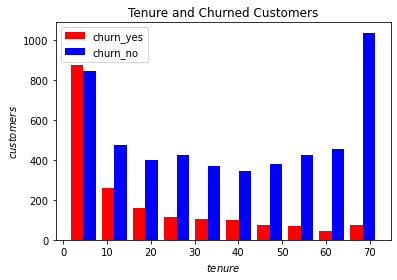

In [22]:
acquire.tenure_vs_churn(telco_df)

### Observing the churn rate of different monthly charges
- #### it appears that customers that pay 70 ~ 110 have a higher churn rate


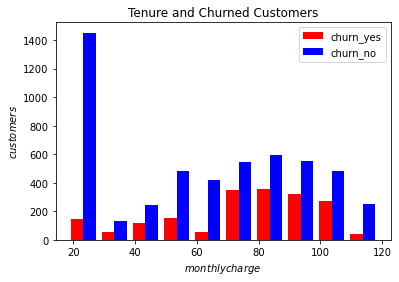

In [6]:
acquire.monthly_charges_churn(telco_df)

### Bivariate Analysis


clear the customer_id column

In [7]:
columns_dropped = ["customer_id"]
telco_df = telco_df.drop(columns = columns_dropped)

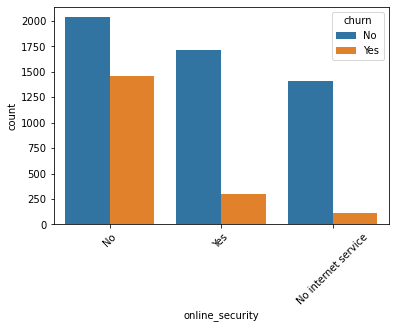

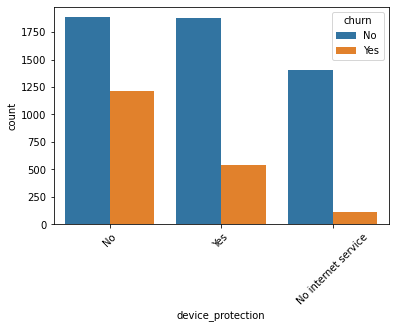

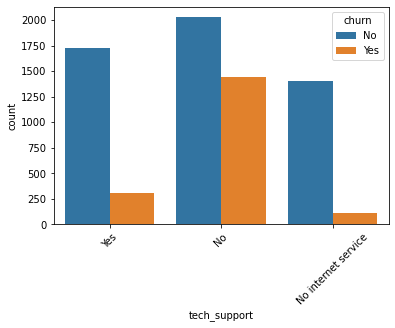

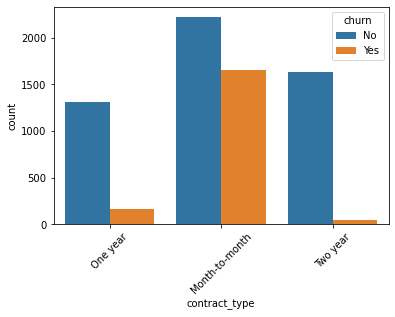

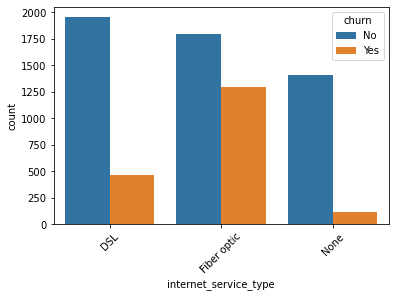

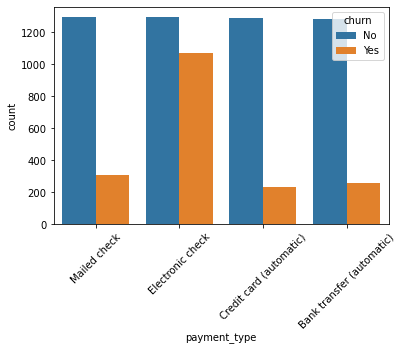

In [8]:
for i, predictor in enumerate(telco_df.drop(columns=['partner','dependents','online_backup','senior_citizen','paperless_billing','churn','tenure', 'gender','total_charges', 'monthly_charges','contract_type_id','payment_type_id', 'internet_service_type_id','contract_type_id','phone_service','streaming_movies','streaming_tv','multiple_lines'])):
    plt.figure(i)
    plot= sns.countplot(data=telco_df, x=predictor, hue='churn')
    plt.setp(plot.get_xticklabels(), rotation=45)    



### Takeaways
- #### It appears that customers with no partners and no dependents have a high churn rate
- #### customers with no tech support and no device protection have a higher probability of churning than those who do
- #### month to month contract type has a higher rate of churn than the 1 year and 2 year contract
- #### fiber optic internet service  
- #### electronic check mode of payment has a high rate of churn and is also the highest sub group in payments

###  Statistical features of numeric variables 

In [9]:
temp_df = telco_df.drop(columns=['senior_citizen','contract_type_id','payment_type_id', 'internet_service_type_id','contract_type_id','phone_service','streaming_movies','streaming_tv','multiple_lines'])
temp_df.describe().T


,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


### Hypothesis testing   
    


In [10]:
alpha = 0.05

### I used pearsons R for linear relationship/ correlation

### customers with tenure
Initial Hypotheses

$H_0$: tenure does not have any effect on whether a customer will churn or not

$H_1$: customers with tenure below one year(new customers) are  likely to churn more than customers past the year mark 

Outcome: I rejected the Null Hypothesis; customers under the one-year tenure mark are one of the highest rated churn groups .


### customers with certain payment_type
Initial Hypotheses

$H_0$: Method of payment does not have any effect on whether a customer will churn or not

$H_1$: customers with electronic check type of payment are likely to churn more than any other method of payment 

Outcome: I rejected the Null Hypothesis; there is a high positive  between the method of payment and the churn rate.





##### for the categorical variables I used Chi2

In [11]:
p_value_df = pd.read_csv('p_value.csv')
p_value_df


,Unnamed: 0,variables,p_values,hypothesis
0,0,Monthly Charges,1.073627e-35,Reject the null hypothesis
1,1,Total Charges,1.295547e-34,Reject the null hypothesis
2,2,Tenure,4.577514e-115,Reject the null hypothesis
3,3,Partner,3.578599e-19,Reject the null hypothesis
4,4,Dependents,1.538574e-24,Reject the null hypothesis
5,5,Multiple Lines,9.985216e-04,Reject the null hypothesis
6,6,Online Security,1.213117e-29,Reject the null hypothesis
7,7,Online Backup,2.031212e-05,Reject the null hypothesis
8,8,Device Protection,1.887008e-04,Reject the null hypothesis
9,9,Tech Support,2.376481e-23,Reject the null hypothesis


# Feature Modeling

evaluation of the current train data set

In [23]:
train, validate, test = train_validate_test_split(train, target = "churn_Yes", seed =123)

X_train = train.drop(columns = ["churn_Yes"])
y_train = train.churn_Yes

X_validate = validate.drop(columns = ["churn_Yes"])
y_validate = validate.churn_Yes

X_test = test.drop(columns = ["churn_Yes"])
y_test = test.churn_Yes

### Baseline

In [15]:
import statistics
# The mode is a great baseline
baseline = y_train.mode()


# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")
baseline

Baseline accuracy: 0.73


0    0
dtype: uint8

## New Train Dataset 

#### After running some decision tree models with the train data, it appears that the model has an F1 score of ~50 for the churners. 
#### It appears that churned data is under represented in the model with a ratio of = 0.73: 0.27 on the train dataset
#### This prompts for an upsample for the training data set


In [16]:
100*train["churn_Yes"].value_counts()/len(train["churn_Yes"])

0    73.411978
1    26.588022
Name: churn_Yes, dtype: float64

In [17]:
churners = train[train["churn_Yes"] == 1]
non_churners  = train[train["churn_Yes"] == 0]

from sklearn.utils import resample
churners_upsample = resample(churners,
             replace=True,
             n_samples=len(non_churners),
             random_state=42)



Great success

In [18]:
new_train = pd.concat([churners_upsample, non_churners])

100*new_train["churn_Yes"].value_counts()/len(new_train["churn_Yes"])

1    50.0
0    50.0
Name: churn_Yes, dtype: float64

In [19]:
new_train, validate, test = train_validate_test_split(new_train, target = "churn_Yes", seed =123)

X_train_new = new_train.drop(columns = ["churn_Yes"])
y_train_new = new_train.churn_Yes

X_validate = validate.drop(columns = ["churn_Yes"])
y_validate = validate.churn_Yes

X_test = test.drop(columns = ["churn_Yes"])
y_test = test.churn_Yes

### Decision Tree model 84% accuracy 

- #### looped multiple  decision trees to find the most optimal models
- #### max depth of 8 seems like the only viable model

In [20]:
tree3 = DecisionTreeClassifier(max_depth=3, random_state=123)

tree3 = tree3.fit(X_train_new, y_train_new)

y_pred_dt = tree3.predict(X_train_new)

In [48]:
df_dt = pd.read_csv("decision_tree_df.csv")
df_dt.sort_values(by = "validate_accuracy", axis=0, ascending=True).head(7)

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.720596,0.692407,0.028190
4,6,0.822198,0.737452,0.084746
3,5,0.791828,0.745174,0.046654
1,3,0.762562,0.749035,0.013527
2,4,0.780784,0.751609,0.029175
5,7,0.856433,0.768340,0.088093
6,8,0.880177,0.791506,0.088671


### Random forest with the new_train 

In [33]:
new_train, validate, test = train_validate_test_split(new_train, target = "churn_Yes", seed =123)

X_train_new = new_train.drop(columns = ["churn_Yes"])
y_train_new = new_train.churn_Yes

X_validate = validate.drop(columns = ["churn_Yes"])
y_validate = validate.churn_Yes

X_test = test.drop(columns = ["churn_Yes"])
y_test = test.churn_Yes


In [34]:
rf_new = RandomForestClassifier(max_depth=5, 
                            random_state=123)

In [35]:
rf_new = rf_new.fit(X_train_new, y_train_new)

In [36]:
y_pred_new = rf_new.predict(X_train_new)
y_pred_proba_new = rf_new.predict_proba(X_train_new)
y_pred_proba_new[0:5]

array([[0.34988959, 0.65011041],
       [0.52808769, 0.47191231],
       [0.92501778, 0.07498222],
       [0.41778086, 0.58221914],
       [0.63859257, 0.36140743]])

In [37]:
y_pred_proba_new = rf_new.predict_proba(X_train_new)


In [38]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(rf_new.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.77


## Model optimization
#### two viable models max depth of 14 and 9

In [49]:
df_rf = pd.read_csv("random_forest_df.csv")
df_rf.sort_values(by= "validate_accuracy",ascending=False).head()


,max_depth,train_accuracy,validate_accuracy,difference
12,14,0.852087,0.827586,0.024501
7,9,0.825318,0.825287,0.000030
14,16,0.849819,0.822989,0.026830
20,22,0.848004,0.822989,0.025015
16,18,0.847096,0.822989,0.024108


### Takeaways

- #### 14 max depth samples per leaf has an 85% train accuracy and 82% validate accuracy
- #### so far this is the best model


## Test my best model 85% accurate on test model

In [42]:
best_model = RandomForestClassifier(max_depth=14, 
                            random_state=123)

In [43]:
best_model = best_model.fit(X_train_new, y_train_new)

In [44]:

best_model = RandomForestClassifier(max_depth=14, 
                            random_state=123)
best_model = best_model.fit(X_train_new, y_train_new)
test.reset_index()

y_predictions = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)
y_proba = y_proba[:,1]
predictions = pd.DataFrame({
    "index" : test.index, # since the customer_id is dropped from X_test, we'll use test here since the indexes line up
    "prediction": y_predictions,
    "probability_of_churn": y_proba
})

predictions.to_csv("predictions.csv",index = 0)

In [47]:
prediction_model = pd.read_csv("predictions.csv")

In [46]:
actual_test = y_test
predicted_test = best_model.predict(X_test)
print(classification_report(actual_test, predicted_test))


              precision    recall  f1-score   support

           0       0.86      0.81      0.84       181
           1       0.82      0.87      0.84       182

    accuracy                           0.84       363
   macro avg       0.84      0.84      0.84       363
weighted avg       0.84      0.84      0.84       363



## Conclusion & Recommendations

- #### due to a high churn rate for customers on month to month contracts incentivize them to switch to yearly contracts
- #### introduce semi annual contracts

- #### discontinue/discourage electronic check payment system for payment purposes (risky: highest number of customers)

- #### have package deals for services to  promote online security, online backup to internet customers

- #### possibly introduce surveys to measure customer satisfaction with the services like tech support




## What can we do with more time?
- #### since fiber optic customers have a high churn rate, we can possible collect industry data and see why the customer have a propensity to churn and what the competition is offering 

- #### lastly, matching the competitions prices on month to month customer prices might heavily reduce the churn rate